In [143]:
import os
import sys
import pandas as pd
import dtale

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [3]:
file_path = r'data\sentiment_data_output_3rdjun.parquet'
# Reading the data for validation
data = pd.read_parquet(file_path, columns=['id', 'subject', 'date_ist', 'time_ist', 'projectid', 'nltk_label', 'sentiment_nltk_score'])
print(data.shape)

(10362, 7)


In [167]:
data['date_ist'] = pd.to_datetime(data['date_ist'])

In [91]:
# d = dtale.show(df)
# d.open_browser()

In [4]:
data.head(2)

,id,subject,date_ist,time_ist,projectid,nltk_label,sentiment_nltk_score
0,6d30273a-6d16-4c9a-b207-31261df388ba,RE: 23-044 Drafting,2024-05-16,05:13:05,76461,POSITIVE,0.5574
1,6b7a51f9-201f-43fa-adc2-f23203ee00d5,RE: 23-043 Drafting,2024-05-18,03:34:35,76461,NEUTRAL,0.0000


In [7]:
data['projectid'].value_counts()

projectid
64591    960
63901    233
78785    136
77043    126
77552    120
        ... 
79093      1
79192      1
78602      1
79391      1
64032      1
Name: count, Length: 717, dtype: int64

In [150]:
# # Filter the DataFrame for the specific project ID
# filtered_data = data[data['projectid'] == 64591]

# Filter the DataFrame for the specific project IDs
#filtered_data = data[data['projectid'].isin([64591, 63901, 78785, 77043, 77552])]

filtered_data = data.copy()

In [151]:
filtered_data[['nltk_label', 'projectid']].value_counts()

nltk_label  projectid
POSITIVE    64591        890
            63901        216
            77043        125
            78785        122
            78996        118
                        ... 
NEUTRAL     77529          1
            77513          1
            77502          1
POSITIVE    78313          1
NEUTRAL     74854          1
Name: count, Length: 1219, dtype: int64

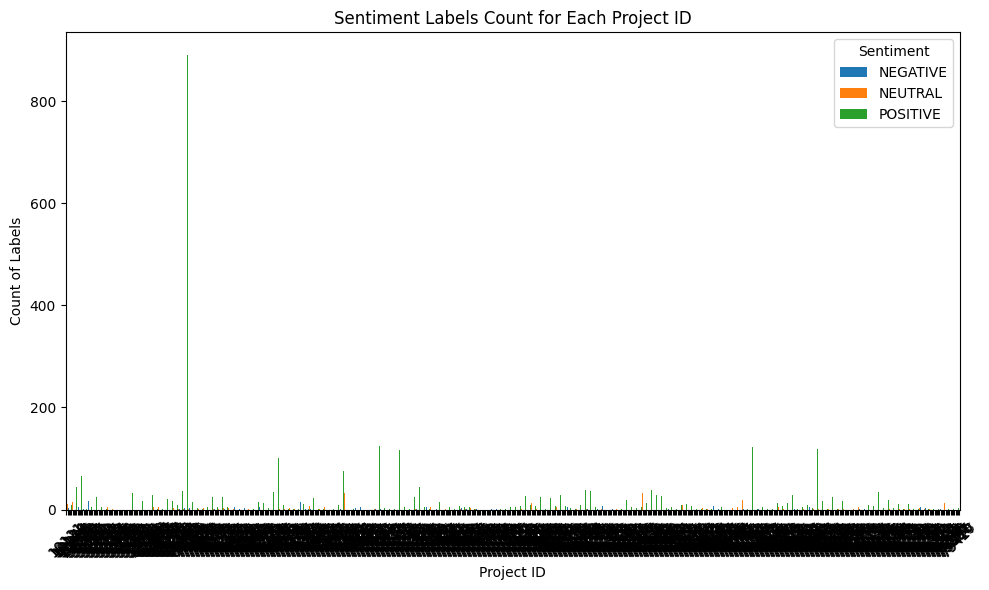

In [152]:
# # Count the labels for each project ID
# label_counts = filtered_data[['nltk_label', 'projectid']].value_counts().reset_index(name='count')

# # Pivot the table to get a better structure for plotting
# label_counts_pivot = label_counts.pivot(index='projectid', columns='nltk_label', values='count').fillna(0)

# # Plot the data
# label_counts_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))

# # Set the plot labels and title
# plt.xlabel('Project ID')
# plt.ylabel('Count of Labels')
# plt.title('Sentiment Labels Count for Each Project ID')
# plt.legend(title='Sentiment')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [153]:
# filtered_data[filtered_data['nltk_label'] == 'NEGATIVE'][['nltk_label', 'sentiment_nltk_score']].sort_values(by='sentiment_nltk_score')

In [154]:
filtered_data.groupby(['projectid', 'nltk_label']).agg(
    {
        'sentiment_nltk_score': ['sum', 'mean', 'median', 'max', 'min'],
        'projectid': 'count'

    }
)

sentiment_nltk_score                                    \
                                      sum      mean  median     max     min   
projectid nltk_label                                                          
10111     POSITIVE                 0.5574  0.557400  0.5574  0.5574  0.5574   
10121     NEGATIVE                -0.6372 -0.318600 -0.3186 -0.2960 -0.3412   
          NEUTRAL                  0.0258  0.002580  0.0000  0.0258  0.0000   
          POSITIVE                20.0818  0.557828  0.5994  0.9821  0.0516   
10134     NEGATIVE                -1.1797 -0.393233 -0.4767 -0.2263 -0.4767   
...                                   ...       ...     ...     ...     ...   
79391     POSITIVE                 0.7003  0.700300  0.7003  0.7003  0.7003   
79410     POSITIVE                 4.1906  0.698433  0.6944  0.7574  0.6174   
79415     NEUTRAL                  0.0000  0.000000  0.0000  0.0000  0.0000   
          POSITIVE                 2.2806  0.760200  0.7345  0.8864  0.6597   
79427     POSITIVE                 5.4778  0.782543  0.8020  0.9595  0.3818   

                     projectid  
                         count  
projectid nltk_label            
10111     POSITIVE           1  
10121     NEGATIVE           2  
          NEUTRAL           10  
          POSITIVE          36  
10134     NEGATIVE           3  
...                        ...  
79391     POSITIVE           1  
79410     POSITIVE           6  
79415     NEUTRAL            1  
          POSITIVE           3  
79427     POSITIVE           7  

[1219 rows x 6 columns]

In [155]:
filtered_data.groupby(['projectid', 'nltk_label']).describe()

sentiment_nltk_score                              \
                                    count      mean       std     min   
projectid nltk_label                                                    
10111     POSITIVE                    1.0  0.557400       NaN  0.5574   
10121     NEGATIVE                    2.0 -0.318600  0.031961 -0.3412   
          NEUTRAL                    10.0  0.002580  0.008159  0.0000   
          POSITIVE                   36.0  0.557828  0.222442  0.0516   
10134     NEGATIVE                    3.0 -0.393233  0.144569 -0.4767   
...                                   ...       ...       ...     ...   
79391     POSITIVE                    1.0  0.700300       NaN  0.7003   
79410     POSITIVE                    6.0  0.698433  0.053709  0.6174   
79415     NEUTRAL                     1.0  0.000000       NaN  0.0000   
          POSITIVE                    3.0  0.760200  0.115514  0.6597   
79427     POSITIVE                    7.0  0.782543  0.204461  0.3818   

                                                         
                           25%     50%      75%     max  
projectid nltk_label                                     
10111     POSITIVE    0.557400  0.5574  0.55740  0.5574  
10121     NEGATIVE   -0.329900 -0.3186 -0.30730 -0.2960  
          NEUTRAL     0.000000  0.0000  0.00000  0.0258  
          POSITIVE    0.438525  0.5994  0.73510  0.9821  
10134     NEGATIVE   -0.476700 -0.4767 -0.35150 -0.2263  
...                        ...     ...      ...     ...  
79391     POSITIVE    0.700300  0.7003  0.70030  0.7003  
79410     POSITIVE    0.674700  0.6944  0.74275  0.7574  
79415     NEUTRAL     0.000000  0.0000  0.00000  0.0000  
          POSITIVE    0.697100  0.7345  0.81045  0.8864  
79427     POSITIVE    0.733600  0.8020  0.93365  0.9595  

[1219 rows x 8 columns]

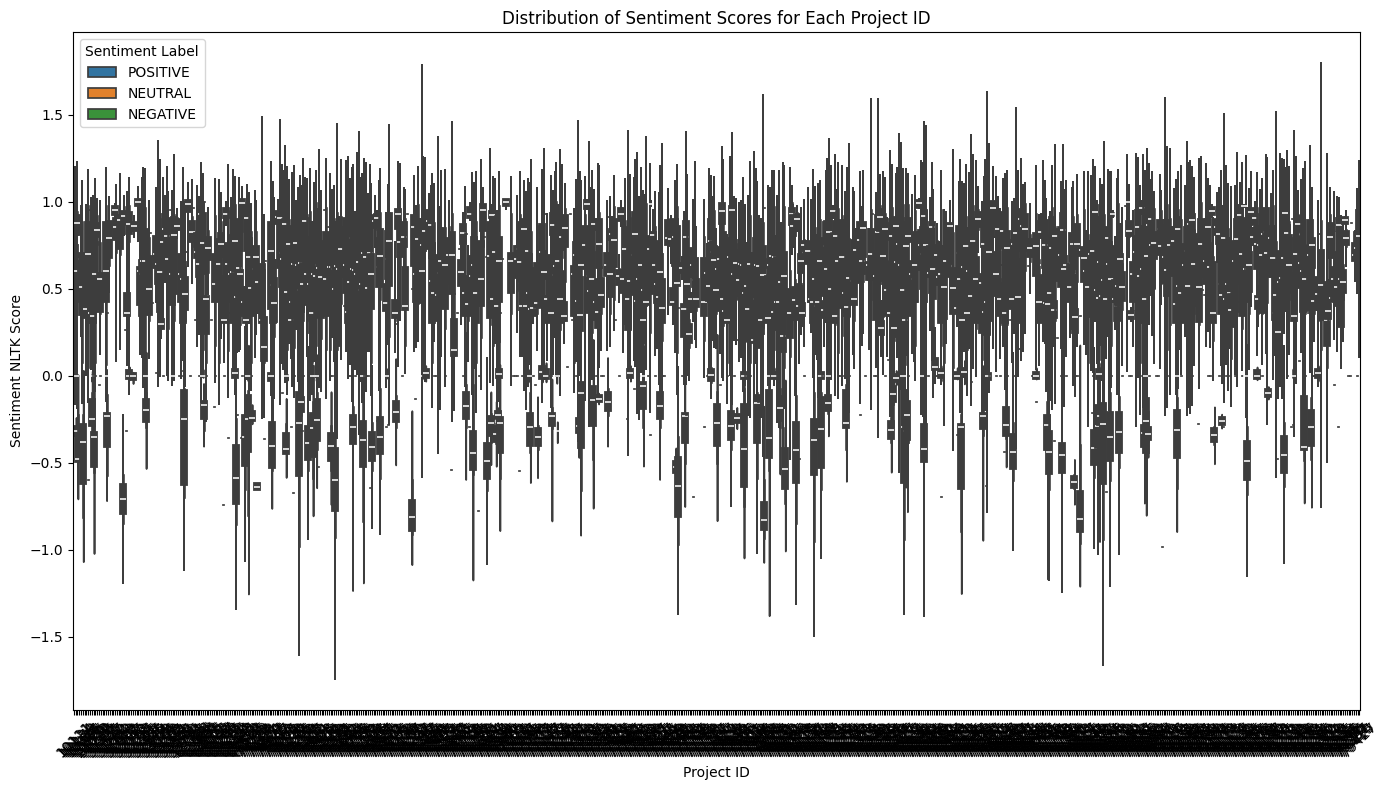

In [156]:
# # Create the plot
# plt.figure(figsize=(14, 8))

# # Use seaborn boxplot to plot the distribution of sentiment scores
# sns.violinplot(data=filtered_data, x='projectid', y='sentiment_nltk_score', hue='nltk_label')
# # sns.histplot(data=filtered_data, x='projectid', y='sentiment_nltk_score', hue='nltk_label')

# # Customizing the plot
# plt.xlabel('Project ID')
# plt.ylabel('Sentiment NLTK Score')
# plt.title('Distribution of Sentiment Scores for Each Project ID')
# plt.legend(title='Sentiment Label')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [157]:
# filtered_data.describe()
filtered_data.columns

Index(['id', 'subject', 'date_ist', 'time_ist', 'projectid', 'nltk_label',
       'sentiment_nltk_score'],
      dtype='object')

In [158]:
# filtered_data[filtered_data['nltk_label'] == 'NEGATIVE']['sentiment_nltk_score'].hist(bins=50)

In [159]:
# Step 3: Aggregate Sentiments at the Project Level
agg_data = filtered_data.groupby(['projectid', 'nltk_label']).agg(
    count=('nltk_label', 'count'),
    median_sentiment=('sentiment_nltk_score', 'median')
) .reset_index()

agg_data

,projectid,nltk_label,count,median_sentiment
0,10111,POSITIVE,1,0.5574
1,10121,NEGATIVE,2,-0.3186
2,10121,NEUTRAL,10,0.0000
3,10121,POSITIVE,36,0.5994
4,10134,NEGATIVE,3,-0.4767
...,...,...,...,...
1214,79391,POSITIVE,1,0.7003
1215,79410,POSITIVE,6,0.6944
1216,79415,NEUTRAL,1,0.0000
1217,79415,POSITIVE,3,0.7345


In [160]:
# Calculate weights for individual emails based on their sentiment scores
def calculate_weight(row):
    if row['nltk_label'] == 'NEGATIVE':
        if -1.0 <= row['sentiment_nltk_score'] <= -0.8:
            return 10
        elif -0.8 < row['sentiment_nltk_score'] <= -0.5:
            return 5
        else:
            return abs(row['sentiment_nltk_score'])
    else:
        return row['sentiment_nltk_score']
    

filtered_data['weighted_score'] = filtered_data.apply(calculate_weight, axis=1)

filtered_data.head(5)

,id,subject,date_ist,time_ist,projectid,nltk_label,sentiment_nltk_score,weighted_score
0,6d30273a-6d16-4c9a-b207-31261df388ba,RE: 23-044 Drafting,2024-05-16,05:13:05,76461,POSITIVE,0.5574,0.5574
1,6b7a51f9-201f-43fa-adc2-f23203ee00d5,RE: 23-043 Drafting,2024-05-18,03:34:35,76461,NEUTRAL,0.0000,0.0000
2,4c74d3e9-230c-4f6b-9e36-3a9986d162d6,RE: Exhaust Louver Size - McMaster,2024-05-13,21:12:48,76187,POSITIVE,0.3182,0.3182
3,af6c2697-de52-4bca-9454-bd9ec04286e8,Re: [EXTERNAL] Re: ABMS Hangar,2024-04-24,21:55:04,77901,NEUTRAL,0.0000,0.0000
4,33feb1a9-3b8f-4d95-82ee-d5accabc96da,RE: Tristar Vault 3D Model,2024-04-18,05:43:17,75205,POSITIVE,0.4576,0.4576


In [161]:
filtered_data[filtered_data['nltk_label'] =='NEGATIVE'].head(5)

,id,subject,date_ist,time_ist,projectid,nltk_label,sentiment_nltk_score,weighted_score
16,48a2348b-7c83-4467-9c35-0b87addc35cd,WD Manor Trimble,2024-05-16,00:30:03,78616,NEGATIVE,-0.3939,0.3939
50,fce7d129-fd71-496a-88f5-054b0a1a7158,RE: 722075 Harper Bentley,2024-04-27,03:43:07,75705,NEGATIVE,-0.3740,0.3740
51,9b331a68-ff56-40dc-9c70-54e3d1663e4d,RE: New Project 724014,2024-05-10,05:25:19,75705,NEGATIVE,-0.2411,0.2411
98,d295633b-74ef-4d70-8c96-a04e7aeb6b4c,RE: R3B: LEX files for review.,2024-04-23,22:30:32,78523,NEGATIVE,-0.2960,0.2960
130,ddfebb75-b071-4833-a559-9a9044999228,SRI Deliverables week of 05/28/2024,2024-05-28,20:53:24,74935,NEGATIVE,-0.5052,5.0000


In [162]:
# Function to aggregate data and add counts
def aggregate_data(df):
    agg_data = df.groupby('projectid').agg(
        total_count=('sentiment_nltk_score', 'count'),
        positive_count=('nltk_label', lambda x: (x == 'POSITIVE').sum()),
        neutral_count=('nltk_label', lambda x: (x == 'NEUTRAL').sum()),
        negative_count=('nltk_label', lambda x: (x == 'NEGATIVE').sum()),
        negative_weight=('weighted_score', lambda x: sum(x[df['nltk_label'] == 'NEGATIVE'])),
        neutral_weight=('weighted_score', lambda x: sum(x[df['nltk_label'] == 'NEUTRAL'])),
        positive_weight=('weighted_score', lambda x: sum(x[df['nltk_label'] == 'POSITIVE']))
    ).reset_index()

    # Calculate total weighted sentiment for each project
    agg_data['total_weighted_sentiment'] = agg_data['negative_weight'] + agg_data['neutral_weight'] + agg_data['positive_weight']

    return agg_data

# Aggregating the data
agg_data_overall = aggregate_data(filtered_data)

agg_data_overall.head(5)

,projectid,total_count,positive_count,neutral_count,negative_count,negative_weight,neutral_weight,positive_weight,total_weighted_sentiment
0,10111,1,1,0,0,0.0000,0.0000,0.5574,0.5574
1,10121,48,36,10,2,0.6372,0.0258,20.0818,20.7448
2,10134,19,16,0,3,1.1797,0.0000,12.3984,13.5781
3,10178,1,1,0,0,0.0000,0.0000,0.5813,0.5813
4,10282,8,8,0,0,0.0000,0.0000,4.9301,4.9301


In [163]:
# Function to tag project overall label based on aggregated weights
def tag_project_label(row):
    if row['negative_weight'] / row['total_weighted_sentiment'] > 0.2:  # Adjust threshold as needed
        return 'NEGATIVE'
    elif row['neutral_weight'] > row['positive_weight']:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

agg_data_overall['overall_project_label'] = agg_data_overall.apply(tag_project_label, axis=1)

agg_data_overall.head(5)

C:\Users\pis05408.PINNACLE\AppData\Local\Temp\ipykernel_636\2131469086.py:3: RuntimeWarning:

invalid value encountered in scalar divide



,projectid,total_count,positive_count,neutral_count,negative_count,negative_weight,neutral_weight,positive_weight,total_weighted_sentiment,overall_project_label
0,10111,1,1,0,0,0.0000,0.0000,0.5574,0.5574,POSITIVE
1,10121,48,36,10,2,0.6372,0.0258,20.0818,20.7448,POSITIVE
2,10134,19,16,0,3,1.1797,0.0000,12.3984,13.5781,POSITIVE
3,10178,1,1,0,0,0.0000,0.0000,0.5813,0.5813,POSITIVE
4,10282,8,8,0,0,0.0000,0.0000,4.9301,4.9301,POSITIVE


In [166]:
# Filter the data for recent emails (last 10 days)
recent_threshold_date = filtered_data['date_ist'].max() - timedelta(days=10)
df_recent = filtered_data[filtered_data['date_ist'] >= recent_threshold_date]

# Aggregating the data for recent project label
agg_data_recent = aggregate_data(df_recent)
agg_data_recent['recent_project_label'] = agg_data_recent.apply(tag_project_label, axis=1)

# Merge the overall and recent labels back to the original data
agg_data = agg_data_overall.merge(agg_data_recent[['projectid', 'recent_project_label']], on='projectid', how='left')

agg_data.head(5)

C:\Users\pis05408.PINNACLE\AppData\Local\Temp\ipykernel_636\2131469086.py:3: RuntimeWarning:

invalid value encountered in scalar divide



,projectid,total_count,positive_count,neutral_count,negative_count,negative_weight,neutral_weight,positive_weight,total_weighted_sentiment,overall_project_label,recent_project_label
0,10111,1,1,0,0,0.0000,0.0000,0.5574,0.5574,POSITIVE,POSITIVE
1,10121,48,36,10,2,0.6372,0.0258,20.0818,20.7448,POSITIVE,POSITIVE
2,10134,19,16,0,3,1.1797,0.0000,12.3984,13.5781,POSITIVE,POSITIVE
3,10178,1,1,0,0,0.0000,0.0000,0.5813,0.5813,POSITIVE,NaN
4,10282,8,8,0,0,0.0000,0.0000,4.9301,4.9301,POSITIVE,POSITIVE


In [165]:
# filtered_data.info()

# filtered_data['date_ist'] = pd.to_datetime(filtered_data['date_ist'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10362 non-null  object 
 1   subject               10362 non-null  object 
 2   date_ist              10362 non-null  object 
 3   time_ist              10362 non-null  object 
 4   projectid             10362 non-null  int64  
 5   nltk_label            10362 non-null  object 
 6   sentiment_nltk_score  10362 non-null  float64
 7   weighted_score        10362 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 647.8+ KB


In [ ]:
# Merge the labels back to the original data if needed
filtered_data = filtered_data.merge(agg_data[['projectid', 'project_label']], on='projectid')

In [ ]:
# Display the resulting DataFrame with project labels
filtered_data.head(5)

,id,subject,date_ist,time_ist,projectid,nltk_label,sentiment_nltk_score,weighted_score
11,91211153-556f-4903-90ff-a2b49f9bbf87,RE: Internal: The Avenue mall Project : Reques...,2024-04-24,13:51:36,64591,POSITIVE,0.6289,0.6289
12,2f74ed10-853d-4e7b-a332-ac39434c52d9,RE: Internal: Composite drawing for sheet 14 B2.,2024-04-18,17:23:37,64591,POSITIVE,0.9552,0.9552
13,56d0fe8e-8f70-420f-a38c-7d70694c2ed7,RE: Internal: LATEST IFC Implementation for Dr...,2024-05-01,13:56:41,64591,POSITIVE,0.9735,0.9735
14,6820ae35-5ea8-4e9d-8b2c-828848bf6fd7,RE: FW: Internal: SM2-SHAFT LIST,2024-05-22,12:27:32,64591,POSITIVE,0.9534,0.9534
21,50d483f4-d967-493d-9795-3be35b6d7214,RE: Internal: Structural Steel Works - AVR The...,2024-05-22,11:25:43,63901,POSITIVE,0.9667,0.9667
